In [69]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# 訓練データの作成

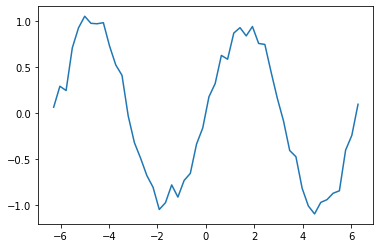

In [70]:
# -2πから2πまでを50等分したデータ
x_data = np.linspace(-2*np.pi, 2*np.pi)
# sin関数にノイズを加える
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data)) 

plt.plot(x_data, sin_data)
plt.show()

In [71]:
n_rnn = 10 # 時系列の数
n_sample = len(x_data)-n_rnn # サンプル数
x = np.zeros((n_sample, n_rnn)) # 入力
t = np.zeros((n_sample, n_rnn))
for i in range(0, n_sample):
    x[i] = sin_data[i:i+n_rnn] 
    t[i] = sin_data[i+1:i+n_rnn+1] # 時系列を入力より1つ後にずらす

# KerasにおけるRNNでは入力が(サンプル数, 時系列の数, 入力層のニューロン層)になっている
x = x.reshape(n_sample, n_rnn, 1) 
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)
print(t.shape)

(40, 10, 1)
(40, 10, 1)


# モデル構築

In [72]:
n_in = 1 # 入力層のニューロン数
n_mid = 20 # 中間層のニューロン数
n_out = 1 # 出力層のニューロン数

model = Sequential()
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model.add(Dense(n_out, activation="linear"))
model.compile(loss="mean_squared_error", optimizer="sgd")
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 10, 20)            440       
                                                                 
 dense_8 (Dense)             (None, 10, 1)             21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


# 学習

In [73]:
history = model.fit(x, t, epochs=20, batch_size=8, validation_split=0.1)

Epoch 1/20
5/5 [==============================] - 1s 56ms/step - loss: 0.3148 - val_loss: 0.2720
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 0.2317 - val_loss: 0.2133
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 0.1870 - val_loss: 0.1728
Epoch 4/20
5/5 [==============================] - 0s 7ms/step - loss: 0.1608 - val_loss: 0.1505
Epoch 5/20
5/5 [==============================] - 0s 7ms/step - loss: 0.1450 - val_loss: 0.1320
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 0.1337 - val_loss: 0.1202
Epoch 7/20
5/5 [==============================] - 0s 8ms/step - loss: 0.1244 - val_loss: 0.1181
Epoch 8/20
5/5 [==============================] - 0s 8ms/step - loss: 0.1170 - val_loss: 0.1101
Epoch 9/20
5/5 [==============================] - 0s 9ms/step - loss: 0.1109 - val_loss: 0.1061
Epoch 10/20
5/5 [==============================] - 0s 8ms/step - loss: 0.1053 - val_loss: 0.1030
Epoch 11/20
5/5 [=====================

# 学習結果

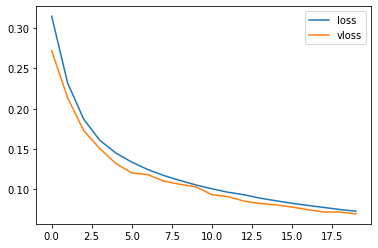

In [74]:
loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss, label="loss")
plt.plot(np.arange(len(vloss)), vloss, label="vloss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 16ms/step


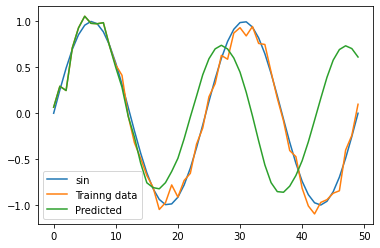

In [75]:
predicted = x[0].reshape(-1)

for i in range(0, n_sample):
    y = model.predict(predicted[-n_rnn:].reshape(1, n_rnn, 1)) # 直近のデータを使って予測を行う
    predicted = np.append(predicted, y[0][n_rnn-1][0])
    
plt.plot(np.arange(len(x_data)), np.sin(x_data), label="sin")
plt.plot(np.arange(len(sin_data)), sin_data, label="Trainng data")
plt.plot(np.arange(len(predicted)), predicted, label="Predicted")
plt.legend()
plt.show()